선형 함수의 층을 아무리 깊게 쌓더라도 결국 하나의 층으로 이뤄진 모델과 수학적으로 차이가 없다.

깊어진 신경망이 유의미하기 위해서는 선형 함수를 통한 계산 결과에 비선형 함수가 적용되어야 한다.

In [1]:
import torch
import torch.nn as nn

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
relu = nn.ReLU()
x = np.arange(-2, 2.1, 0.25)
x = torch.tensor(x).float()
y = relu(x)

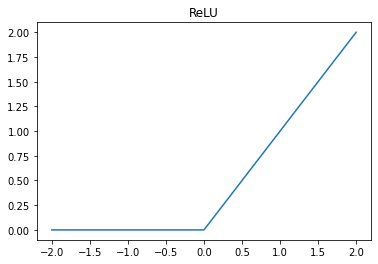

In [ ]:
plt.plot(x.data, y.data)
plt.title('ReLU')
plt.show()

$x < 0$에서는 0, $x >= 0$에서는 $y = x$인 매우 간단한 함수
***
## GPU 사용 규칙

- 텐서 변수는 데이터가 CPU와 GPU 중 어디에 속하는지를 속성으로 갖는다.
- CPU와 GPU 사이에서 데이터는 to 함수로 전송한다.
- 두 개의 변수가 모두 GPU에 올라가 있는 경우 연산은 GPU로 수행한다.
- 두 변수 중 한쪽이 CPU 다른 한 쪽이 GPU에 올라가 있는 경우 연산은 에러가 발생한다.

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
device

device(type='cuda', index=0)

In [ ]:
x = np.arange(-2, 2.1, 0.25)
y = np.arange(-1, 3.1, 0.25)

In [ ]:
x = torch.tensor(x).float()
y = torch.tensor(y).float()

In [ ]:
z = x + y

In [ ]:
z

tensor([-3.0000, -2.5000, -2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,
         1.0000,  1.5000,  2.0000,  2.5000,  3.0000,  3.5000,  4.0000,  4.5000,
         5.0000])

In [ ]:
z.device

device(type='cpu')

In [ ]:
x = x.to(device)

In [ ]:
x.device, y.device

(device(type='cuda', index=0), device(type='cpu'))

In [ ]:
x + y # 이 상태에서 x와 y의 연산을 수행하면 에러 발생

RuntimeError: ignored

In [ ]:
y = y.to(device)

In [ ]:
x + y

tensor([-3.0000, -2.5000, -2.0000, -1.5000, -1.0000, -0.5000,  0.0000,  0.5000,
         1.0000,  1.5000,  2.0000,  2.5000,  3.0000,  3.5000,  4.0000,  4.5000,
         5.0000], device='cuda:0')

***
## 데이터 준비

- 데이터 입수 : Dataset
- 데이터 전처리 : Transforms
- 미니 배치용 데이터셋 생성 : DataLoader


### 1. 데이터 입수

In [4]:
import torchvision.datasets as datasets

In [5]:
data_root = './data'

In [5]:
train = datasets.MNIST(root = data_root, train = True, download = True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
!ls -lR ./data/MNIST

./data/MNIST:
total 4
drwxr-xr-x 2 root root 4096 Jan  2 12:34 raw

./data/MNIST/raw:
total 65008
-rw-r--r-- 1 root root  7840016 Jan  2 12:34 t10k-images-idx3-ubyte
-rw-r--r-- 1 root root  1648877 Jan  2 12:34 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    10008 Jan  2 12:34 t10k-labels-idx1-ubyte
-rw-r--r-- 1 root root     4542 Jan  2 12:34 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 47040016 Jan  2 12:34 train-images-idx3-ubyte
-rw-r--r-- 1 root root  9912422 Jan  2 12:34 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    60008 Jan  2 12:34 train-labels-idx1-ubyte
-rw-r--r-- 1 root root    28881 Jan  2 12:34 train-labels-idx1-ubyte.gz


In [7]:
print(f"데이터 수는 {len(train)}개")

데이터 수는 60000개


In [8]:
image, label = train[0]

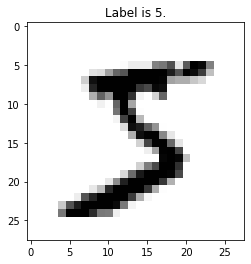

In [9]:
plt.title(f'Label is {label}.')
plt.imshow(image, cmap = 'gray_r')
plt.show()

### 2. 데이터 전처리(Transforms)

- ToTensor : 텐서 형식으로 데이터를 변환해준다.

In [6]:
import torchvision.transforms as transforms

In [11]:
transform1 = transforms.Compose([
    transforms.ToTensor(),
])

In [13]:
train_set1 = datasets.MNIST(root = data_root, train = True, download = True, transform = transform1)

In [14]:
image, label = train_set1[0]

In [17]:
print(f"데이터 타입 : {type(image)}")
print(f"최솟값 : {image.data.min()}")
print(f"최댓값 : {image.data.max()}")

데이터 타입 : <class 'torch.Tensor'>
최솟값 : 0.0
최댓값 : 1.0


- Normalize : 정규화

In [18]:
transform2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5), # mu = 0.5, sigma = 0.5로 하면 -1 ~ 1로 정규화 가능
])

In [19]:
train_set2 = datasets.MNIST(root = data_root, train = True, download = True, transform = transform2)

In [20]:
image, label = train_set2[0]

In [21]:
print(f"데이터 타입 : {type(image)}")
print(f"최솟값 : {image.data.min()}")
print(f"최댓값 : {image.data.max()}")

데이터 타입 : <class 'torch.Tensor'>
최솟값 : -1.0
최댓값 : 1.0


- Lambda 클래스

In [7]:
transform3 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x : x.view(-1))
])

In [23]:
train_set3 = datasets.MNIST(root = data_root, train = True, download = True, transform = transform3)

In [24]:
image, label = train_set3[0]

In [25]:
print(f"데이터 타입 : {type(image)}")
print(f"데이터 shape : {image.shape}")
print(f"최솟값 : {image.data.min()}")
print(f"최댓값 : {image.data.max()}")

데이터 타입 : <class 'torch.Tensor'>
데이터 shape : torch.Size([784])
최솟값 : -1.0
최댓값 : 1.0


In [8]:
train_set = datasets.MNIST(root = data_root, train = True, download = True, transform = transform3)
test_set = datasets.MNIST(root = data_root, train = False, download = True, transform = transform3)

### 3. 배치 데이터 생성
- DataLoader

In [9]:
from torch.utils.data import DataLoader

In [23]:
bs = 1024

In [24]:
tr_loader = DataLoader(train_set, batch_size = bs, shuffle = True)
te_loader = DataLoader(test_set, batch_size = bs, shuffle = False)

***

In [ ]:
n_input = image.shape[0] # 784
n_output = 10

In [13]:
class Net(nn.Module) :

  def __init__(self, n_input, n_output) :
    super().__init__()
    self.layer1 = nn.Linear(n_input, 256)
    self.bn1 = nn.BatchNorm1d(256)
    self.relu1 = nn.LeakyReLU()
    self.layer2 = nn.Linear(256, 64)
    self.bn2 = nn.BatchNorm1d(64)
    self.relu2 = nn.LeakyReLU(64, inplace = True)
    self.layer3 = nn.Linear(64, n_output)

  def forward(self, x) :
    x = self.layer1(x)
    x = self.bn1(x)
    x = self.relu1(x)
    x = self.layer2(x)
    x = self.bn2(x)
    x = self.relu2(x)
    x = self.layer3(x)

    return x

In [14]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [36]:
net = Net(784, 10)

In [37]:
net = net.to(device)

In [38]:
net

Net(
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): LeakyReLU(negative_slope=0.01)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): LeakyReLU(negative_slope=64, inplace=True)
  (layer3): Linear(in_features=64, out_features=10, bias=True)
)

In [39]:
for parameter in net.named_parameters() :
  print(parameter)

('layer1.weight', Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [ 0.0307,  0.0202,  0.0212,  ...,  0.0272,  0.0314,  0.0152],
        [-0.0355,  0.0334, -0.0232,  ...,  0.0185, -0.0292, -0.0017],
        [-0.0068, -0.0321,  0.0248,  ..., -0.0255, -0.0138, -0.0288]],
       device='cuda:0', requires_grad=True))
('layer1.bias', Parameter containing:
tensor([ 0.0214, -0.0092,  0.0252,  0.0054, -0.0258, -0.0166, -0.0220, -0.0342,
        -0.0085,  0.0256, -0.0313, -0.0035,  0.0126,  0.0164,  0.0323, -0.0243,
         0.0015,  0.0066,  0.0342, -0.0187,  0.0285,  0.0317,  0.0150,  0.0209,
        -0.0146,  0.0140,  0.0086,  0.0305, -0.0045,  0.0026,  0.0236, -0.0042,
        -0.0229,  0.0194, -0.0331,  0.0304, -0.0212,  0.0333, -0.0287,  0.0210,
         0.0166,  0.0281,  0.0161,  0.0301,

In [39]:
lr = 0.01
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(net.parameters(), lr = lr)

In [21]:
from tqdm.notebook import tqdm_notebook

In [40]:
for epoch in tqdm_notebook(range(15)) :

  tr_acc, tr_cnt = 0.0, 0.0
  te_acc, te_cnt = 0.0, 0.0

  net.train()
  for img, cls in tr_loader :
    
    img = img.to(device)
    cls = cls.to(device)

    optimizer.zero_grad()

    pred = net(img)
    pred_cls = torch.max(pred, 1)[1]

    loss = criterion(pred, cls)
    loss.backward()

    optimizer.step()
    
    tr_acc += (pred_cls == cls).sum().item()
    tr_cnt += len(cls)
  
  net.eval()
  with torch.no_grad() : 
    for img, cls in te_loader :

      img = img.to(device)
      cls = cls.to(device)

      optimizer.zero_grad()

      pred = net(img)
      pred_cls = torch.max(pred, 1)[1]

      loss = criterion(pred, cls)

      te_acc += (pred_cls == cls).sum().item()
      te_cnt += len(cls)

  print(f"{epoch + 1} Epoch Train Accuracy : {tr_acc / tr_cnt} Test Accuracy : {te_acc / te_cnt}")

  0%|          | 0/15 [00:00<?, ?it/s]

1 Epoch Train Accuracy : 0.8638 Test Accuracy : 0.9216
2 Epoch Train Accuracy : 0.9398666666666666 Test Accuracy : 0.935
3 Epoch Train Accuracy : 0.9536 Test Accuracy : 0.9531
4 Epoch Train Accuracy : 0.9620666666666666 Test Accuracy : 0.9529
5 Epoch Train Accuracy : 0.9678 Test Accuracy : 0.9581
6 Epoch Train Accuracy : 0.9728666666666667 Test Accuracy : 0.9632
7 Epoch Train Accuracy : 0.9757666666666667 Test Accuracy : 0.9645
8 Epoch Train Accuracy : 0.9797333333333333 Test Accuracy : 0.9649
9 Epoch Train Accuracy : 0.9824666666666667 Test Accuracy : 0.9594
10 Epoch Train Accuracy : 0.9852666666666666 Test Accuracy : 0.9634
11 Epoch Train Accuracy : 0.9869166666666667 Test Accuracy : 0.9636
12 Epoch Train Accuracy : 0.9895 Test Accuracy : 0.967
13 Epoch Train Accuracy : 0.9927333333333334 Test Accuracy : 0.968
14 Epoch Train Accuracy : 0.9925666666666667 Test Accuracy : 0.9695
15 Epoch Train Accuracy : 0.9917833333333334 Test Accuracy : 0.9628
